In [ ]:
# !python --version 
#Python 3.7.12

In [1]:
# import tensorflow
# import keras
# import matplotlib
# import seaborn
# import numpy

In [ ]:
# print("Tensor flow version: ", tensorflow.__version__)
# print("Keras flow version: ", keras.__version__)
# print("Matplotlib flow version: ", matplotlib.__version__)
# print("Seaborn flow version: ", seaborn.__version__)
# print("Numpy flow version: ", numpy.__version__)

# Tensor flow version:  2.8.0
# Keras flow version:  2.8.0
# Matplotlib flow version:  3.2.2
# Seaborn flow version:  0.11.2
# Numpy flow version:  1.21.5

## **Import necessary Libraries**

In [25]:
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [5]:
train_data_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/By Create Own Model/face identification dataset/train"

validation_data_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/By Create Own Model/face identification dataset/valid"

### **Make a function for showing augmented images**

In [6]:
def plotImages(image_arr):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
    axes = axes.flatten()
    for image, ax in zip(image_arr, axes):
        ax.imshow(image)
    plt.tight_layout()
    plt.show()

In [7]:
# This is the augmentation configuration we will use for training
# It will generate more images using below parameters

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode="nearest")

In [8]:
# This is a generator that will read pictures found in 
# at train_data_path, and indefinitely generate batches of augmented image data

training_data = training_datagen.flow_from_directory(directory=train_data_path,# this is the target directory
                                                     target_size=(200,200),# all images will be resized to 200 x 200
                                                     batch_size=32, # Pick 32 img at a time
                                                     class_mode="binary")# since we use binary_crossentropy loss, we need binary labels

Found 171 images belonging to 3 classes.


In [9]:
# Show the class labels
training_data.class_indices

{'alamin': 0, 'rita': 1, 'tanim': 2}

In [10]:
# this is the Augmentation configuration we will use for validation: only apply rescaling

validation_datagen = ImageDataGenerator(rescale=1./255)

# This is a similar generator, for validation data
validation_data = validation_datagen.flow_from_directory(directory=validation_data_path,# this is the target dir
                                                     target_size=(200,200),# all images will be resized to 200 x 200
                                                     batch_size=32, # Pick 32 img at a time
                                                     class_mode="binary")# since we use binary_crossentropy loss, we need binary labels

Found 25 images belonging to 3 classes.


In [11]:
# Show the class labels
validation_data.class_indices

{'alamin': 0, 'rita': 1, 'tanim': 2}

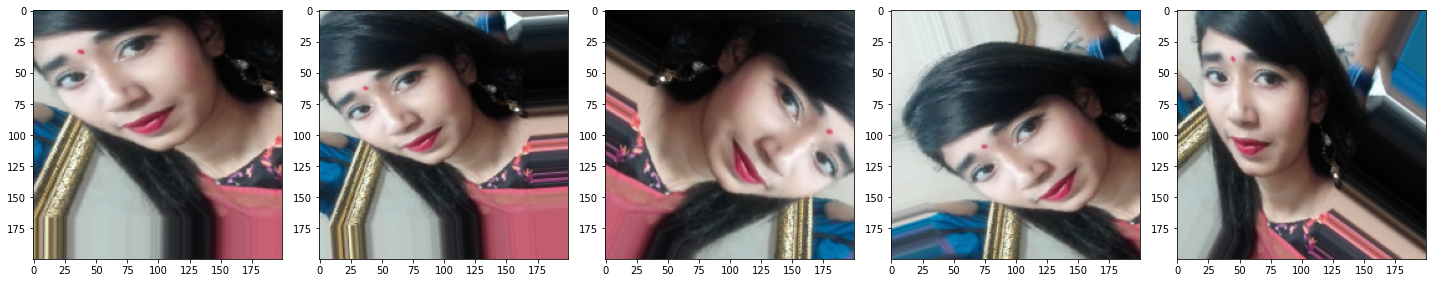

In [16]:
# Showing Augmented Images

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

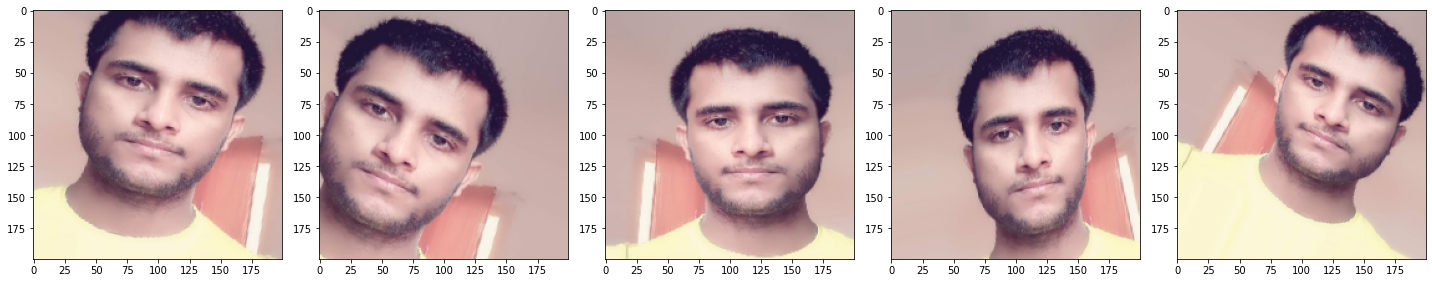

In [17]:
images2 = [training_data[1][0][0] for i in range(5)]
plotImages(images2)

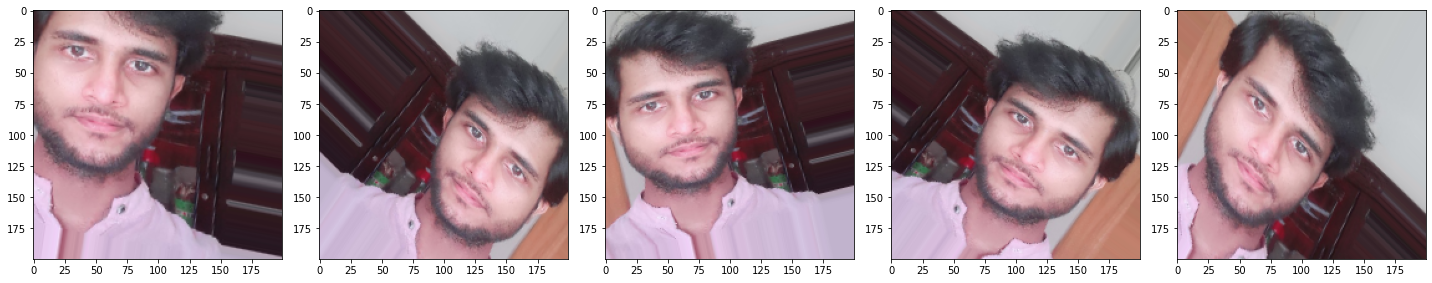

In [19]:
images3 = [training_data[3][0][0] for i in range(5)]
plotImages(images3)

In [20]:
images[0]

array([[[0.18823704, 0.2939624 , 0.3370507 ],
        [0.17496316, 0.2807249 , 0.323822  ],
        [0.17522404, 0.28101718, 0.3241247 ],
        ...,
        [0.070886  , 0.09069724, 0.1161366 ],
        [0.0635013 , 0.08335441, 0.1087833 ],
        [0.0688017 , 0.09043052, 0.11498202]],

       [[0.18815729, 0.2835099 , 0.32313725],
        [0.17487839, 0.2702624 , 0.30990022],
        [0.17041557, 0.26583102, 0.30547926],
        ...,
        [0.05918508, 0.07028756, 0.09484333],
        [0.05901901, 0.07078373, 0.09536041],
        [0.06807717, 0.0821588 , 0.10559797]],

       [[0.19740506, 0.2915227 , 0.3307384 ],
        [0.1995202 , 0.29363784, 0.33285353],
        [0.19064318, 0.28476083, 0.32397652],
        ...,
        [0.05415294, 0.06263559, 0.08125814],
        [0.05256273, 0.0623778 , 0.08101083],
        [0.05568732, 0.06552333, 0.08416682]],

       ...,

       [[0.67335635, 0.58708185, 0.36556557],
        [0.7098733 , 0.6235988 , 0.42864034],
        [0.41974282, 0

In [22]:
training_data[0][0][0]

array([[[0.808038  , 0.8317136 , 0.8238218 ],
        [0.8111302 , 0.83400226, 0.82648784],
        [0.81490445, 0.83702165, 0.8298846 ],
        ...,
        [0.6779577 , 0.5906284 , 0.5357264 ],
        [0.6637025 , 0.5720243 , 0.51761633],
        [0.6438896 , 0.54230493, 0.49119917]],

       [[0.82220095, 0.85649866, 0.8450661 ],
        [0.8206913 , 0.8538567 , 0.8428016 ],
        [0.81918156, 0.85121477, 0.840537  ],
        ...,
        [0.67772484, 0.59138274, 0.5364808 ],
        [0.6669539 , 0.5766514 , 0.5226502 ],
        [0.6530933 , 0.55099916, 0.5000854 ]],

       [[0.8074865 , 0.8427806 , 0.8310159 ],
        [0.8093736 , 0.84466773, 0.832903  ],
        [0.81126076, 0.8465549 , 0.83479017],
        ...,
        [0.6748018 , 0.5885273 , 0.53362536],
        [0.6656688 , 0.5771539 , 0.5225629 ],
        [0.6500651 , 0.5545642 , 0.5014305 ]],

       ...,

       [[0.78171235, 0.7836926 , 0.7372938 ],
        [0.74604523, 0.74076104, 0.6910602 ],
        [0.553441  , 0

In [23]:
# Save the best model using val-accuracy

model_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/By Create Own Model/cnn_best_model.h5"

checkpoint = ModelCheckpoint(filepath=model_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks_list = [checkpoint]

## **Building CNN model**

In [26]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    
                                    # Apply Dropout to reduce overfit model
                                    keras.layers.Dropout(0.5),
                                    
                                    # add Flatten layer for make 1-D array so that Dense layer can take as a input                                                                      
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    # add first hidden layer                                   
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [28]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [30]:
# Train the CNN model and Fit the model

history = model.fit(x=training_data,
                    batch_size=30, 
                    epochs=30, 
                    verbose=1, 
                    validation_data=validation_data,
                    callbacks=callbacks_list)

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 1.2640 - accuracy: 0.3392
Epoch 1: val_accuracy improved from -inf to 0.44000, saving model to /content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/By Create Own Model/cnn_best_model.h5
6/6 [==============================] - 23s 4s/step - loss: 1.2640 - accuracy: 0.3392 - val_loss: 1.1084 - val_accuracy: 0.4400
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 1.1631 - accuracy: 0.3684
Epoch 2: val_accuracy did not improve from 0.44000
6/6 [==============================] - 9s 2s/step - loss: 1.1631 - accuracy: 0.3684 - val_loss: 1.0123 - val_accuracy: 0.4400
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 1.1267 - accuracy: 0.3684
Epoch 3: val_accuracy improved from 0.44000 to 0.52000, saving model to /content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/By Create Own Model/cnn_best_model.h5

In [31]:
# Train model again from 31 epochs

history = model.fit(x=training_data,
                    batch_size=30, 
                    epochs=30, 
                    verbose=1, 
                    validation_data=validation_data,
                    callbacks=callbacks_list)

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.5965
Epoch 1: val_accuracy did not improve from 0.92000
6/6 [==============================] - 8s 1s/step - loss: 0.8067 - accuracy: 0.5965 - val_loss: 0.5889 - val_accuracy: 0.7200
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 0.7181 - accuracy: 0.6784
Epoch 2: val_accuracy did not improve from 0.92000
6/6 [==============================] - 7s 1s/step - loss: 0.7181 - accuracy: 0.6784 - val_loss: 0.5998 - val_accuracy: 0.8000
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 0.7188 - accuracy: 0.6959
Epoch 3: val_accuracy did not improve from 0.92000
6/6 [==============================] - 8s 1s/step - loss: 0.7188 - accuracy: 0.6959 - val_loss: 0.5216 - val_accuracy: 0.8400
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 0.6507 - accuracy: 0.6959
Epoch 4: val_accuracy did not improve from 0.92000
6/6 [==============================] - 8s 1s/step 

In [32]:
model_path2 = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Person Identification Project/By Create Own Model/cnn_best_model2.h5"
model.save(filepath=model_path2)

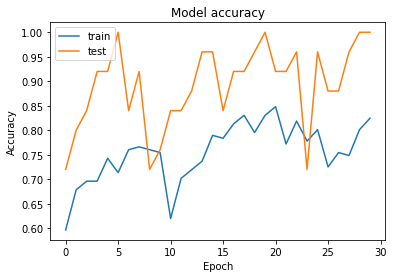

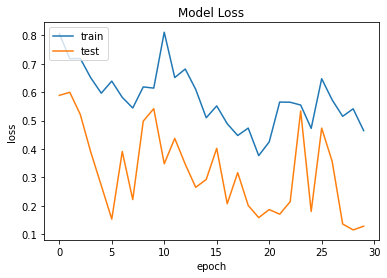

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
history.history['accuracy']

[0.5964912176132202,
 0.6783625483512878,
 0.6959064602851868,
 0.6959064602851868,
 0.7426900863647461,
 0.7134503126144409,
 0.7602339386940002,
 0.7660818696022034,
 0.7602339386940002,
 0.7543859481811523,
 0.6198830604553223,
 0.7017543911933899,
 0.719298243522644,
 0.7368420958518982,
 0.7894737124443054,
 0.7836257219314575,
 0.8128654956817627,
 0.8304093480110168,
 0.7953216433525085,
 0.8304093480110168,
 0.847953200340271,
 0.7719298005104065,
 0.8187134265899658,
 0.7777777910232544,
 0.8011695742607117,
 0.7251461744308472,
 0.7543859481811523,
 0.7485380172729492,
 0.8011695742607117,
 0.8245614171028137]

In [37]:
history.history['val_accuracy']

[0.7200000286102295,
 0.800000011920929,
 0.8399999737739563,
 0.9200000166893005,
 0.9200000166893005,
 1.0,
 0.8399999737739563,
 0.9200000166893005,
 0.7200000286102295,
 0.7599999904632568,
 0.8399999737739563,
 0.8399999737739563,
 0.8799999952316284,
 0.9599999785423279,
 0.9599999785423279,
 0.8399999737739563,
 0.9200000166893005,
 0.9200000166893005,
 0.9599999785423279,
 1.0,
 0.9200000166893005,
 0.9200000166893005,
 0.9599999785423279,
 0.7200000286102295,
 0.9599999785423279,
 0.8799999952316284,
 0.8799999952316284,
 0.9599999785423279,
 1.0,
 1.0]